# Data Cleaning and Data Understanding

In this notebook, various movie-related datasets will be read into Pandas dataframes and prepared/cleaned for analysis. 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

***

## IMDB Data Sets

The follow datasets were obtained from IMDB on March 12, 2021. They are in tab-separated variable format. The tconst column is an identifier that can be used to join datasets on unique movies.
* DL Link: https://datasets.imdbws.com
***

### Rating Data

title.ratings.tsv.gz – 

Contains the IMDb rating and votes information for titles
* `tconst` (string) - alphanumeric unique identifier of the title
* `averageRating` (float) – weighted average of all the individual user ratings
* `numVotes` (integer)- number of votes the title has received

For this analysis, the rating data and number of votes for a particular movie might be useful to consider, as it could be indicative of popularity or critical reception in relation to other features. These could be potential targets for machine learning models if the desired goal is to maximize rating.  However, because the rating and number of votes are dependent variables themselves, they can not be used as predictive features. 

The ratings and number of votes in this set are specific to the IMDB site at a specific point in time.  The ratings are votes cast by registered IMDB users, and represent a different population than other rating sites such as TMDB, Rotten Tomatoes, etc. As events occur, public reception to movies will change over time - for example: cult classics which may have poor initial reception but gain popularity within subcultures ie. Rocky Horror Picture Show. The analysis of this dataset will be specific to the IMDB site and the data was current as of March 12, 2021. 

In [2]:
rating_data = pd.read_csv('../data2/data.tsv', delimiter= '\t')
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131280 entries, 0 to 1131279
Data columns (total 3 columns):
tconst           1131280 non-null object
averageRating    1131280 non-null float64
numVotes         1131280 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 25.9+ MB


In [3]:
rating_data.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1688
1,tt0000002,6.0,209
2,tt0000003,6.5,1431
3,tt0000004,6.1,122
4,tt0000005,6.1,2229


The rating dataset has all observations containing data of the appropriate type with no missing values.

In [11]:
rating_data.describe()

,averageRating,numVotes
count,1.131280e+06,1.131280e+06
mean,6.898927e+00,9.539682e+02
std,1.396606e+00,1.605107e+04
min,1.000000e+00,5.000000e+00
25%,6.100000e+00,9.000000e+00
50%,7.100000e+00,2.000000e+01
75%,7.900000e+00,7.900000e+01
max,1.000000e+01,2.360207e+06


From the summary statistics, the average rating has a mean score of ~6.9, and a standard deviation of ~1.4. The minimum score listed is 1, the max is 10, with a median rating of 7.1.

The number of votes has a much higher disparity, with a mean of ~950, standard deviation of ~16,000. The minimum number of votes is 5, while the max is 2.36 million, with a median of 20 votes.

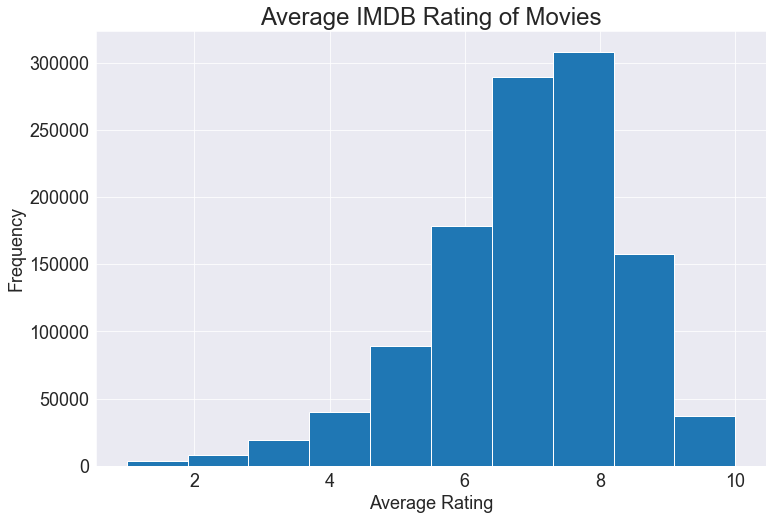

In [82]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Average IMDB Rating of Movies',
             fontsize = 24)
ax.tick_params(labelsize = 18)
ax.set_xlabel('Average Rating',
              fontsize = 18)
ax.set_ylabel('Frequency',
              fontsize = 18)
ax.hist(rating_data.averageRating);

A brief examination of the ratings of movies shows a left-tailed distribution, indicating that most movies tend to be higher rated, with a peak frequency at around a rating of 7-8.

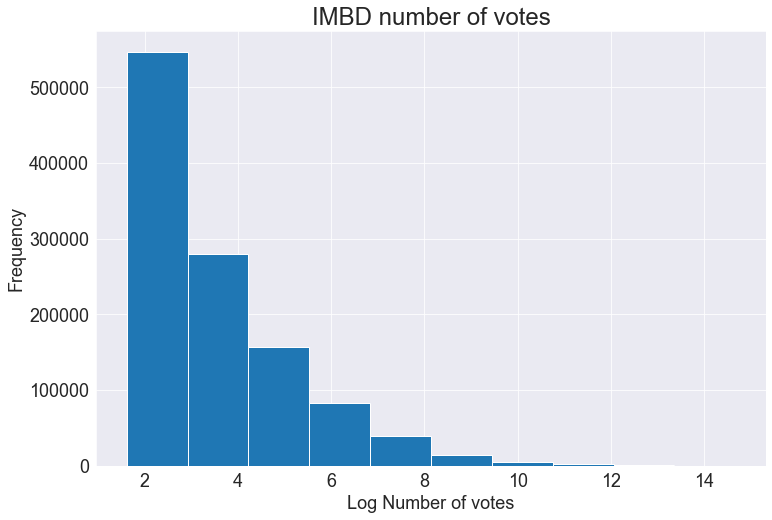

In [83]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('IMBD number of votes',
             fontsize = 24)
ax.tick_params(labelsize = 18)
ax.set_xlabel('Log Number of votes',
              fontsize = 18)
ax.set_ylabel('Frequency',
              fontsize = 18)
ax.hist(np.log(rating_data.numVotes));

The number of votes distribution is highly right-tailed, with the majority of votes being low, while very few movies have a high number of votes.

### Episode Data

title.episode.tsv.gz

Contains the tv episode information. Fields include:
* tconst (string) - alphanumeric identifier of episode
* parentTconst (string) - alphanumeric identifier of the parent TV Series
* seasonNumber (integer) – season number the episode belongs to
* episodeNumber (integer) – episode number of the tconst in the TV series

In [16]:
episode_data = pd.read_csv('../data2/data-2.tsv', delimiter= '\t')
episode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5593137 entries, 0 to 5593136
Data columns (total 4 columns):
tconst           object
parentTconst     object
seasonNumber     object
episodeNumber    object
dtypes: object(4)
memory usage: 170.7+ MB


In [17]:
episode_data.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


The episode dataset `seasonNumber` and `episodeNumber` columns contain numbers and the string value `\N`, resulting in a string dtype column.
***

### Crew Data

title.crew.tsv.gz

Contains the director and writer information for all the titles in IMDb. Fields include:
* tconst (string) - alphanumeric unique identifier of the title
* directors (array of nconsts) - director(s) of the given title
* writers (array of nconsts) – writer(s) of the given title

In [4]:
crew_data = pd.read_csv('../data2/data-3.tsv', delimiter= '\t')
crew_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7700095 entries, 0 to 7700094
Data columns (total 3 columns):
tconst       object
directors    object
writers      object
dtypes: object(3)
memory usage: 176.2+ MB


In [8]:
crew_data.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


***

### Title Basics Data

title.basics.tsv.gz

Contains the following information for titles:
* tconst (string) - alphanumeric unique identifier of the title
* titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
* primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
* originalTitle (string) - original title, in the original language
* isAdult (boolean) - 0: non-adult title; 1: adult title
* startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
* endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
* runtimeMinutes – primary runtime of the title, in minutes
* genres (string array) – includes up to three genres associated with the title

In [6]:
title_data = pd.read_csv('../data2/data-4.tsv', delimiter= '\t')
title_data.info()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7700095 entries, 0 to 7700094
Data columns (total 9 columns):
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtypes: object(9)
memory usage: 528.7+ MB


In [7]:
title_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


***

### Name Data

name.basics.tsv.gz

Contains the following information for names:
* nconst (string) - alphanumeric unique identifier of the name/person
* primaryName (string)– name by which the person is most often credited
* birthYear – in YYYY format
* deathYear – in YYYY format if applicable, else '\N'
* primaryProfession (array of strings)– the top-3 professions of the person
* knownForTitles (array of tconsts) – titles the person is known for

In [10]:
pd.read_csv('../data2/data-5.tsv', delimiter= '\t')

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0075213,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0049189,tt0054452,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0078723,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0050986,tt0050976,tt0060827"
...,...,...,...,...,...,...
10779977,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department",tt2455546
10779978,nm9993716,Essias Loberg,\N,\N,NaN,\N
10779979,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
10779980,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


***

### Akas Data

title.akas.tsv.gz

Contains the following information for titles:
* titleId (string) - a tconst, an alphanumeric unique identifier of the title
* ordering (integer) – a number to uniquely identify rows for a given titleId
* title (string) – the localized title
* region (string) - the region for this version of the title
* language (string) - the language of the title
* types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", * "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
* attributes (array) - Additional terms to describe this alternative title, not enumerated
* isOriginalTitle (boolean) – 0: not original title; 1: original title

In [11]:
pd.read_csv('../data2/data-6.tsv', delimiter= '\t')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
25505407,tt9916852,4,エピソード #3.20,JP,ja,\N,\N,0
25505408,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
25505409,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
25505410,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0


***

### Principals Data

title.principals.tsv.gz

Contains the principal cast/crew for titles
* tconst (string) - alphanumeric unique identifier of the title
* ordering (integer) – a number to uniquely identify rows for a given titleId
* nconst (string) - alphanumeric unique identifier of the name/person
* category (string) - the category of job that person was in
* job (string) - the specific job title if applicable, else '\N'
* characters (string) - the name of the character played if applicable, else '\N'

In [13]:
principals_data = pd.read_csv('../data2/data-7.tsv', delimiter= '\t')
principals_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43530070 entries, 0 to 43530069
Data columns (total 6 columns):
tconst        object
ordering      int64
nconst        object
category      object
job           object
characters    object
dtypes: int64(1), object(5)
memory usage: 1.9+ GB


In [14]:
principals_data.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
